In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# set random seed to ensure reproducible runs
RSEED = 50


Text(0.5, 1.0, 'Data')

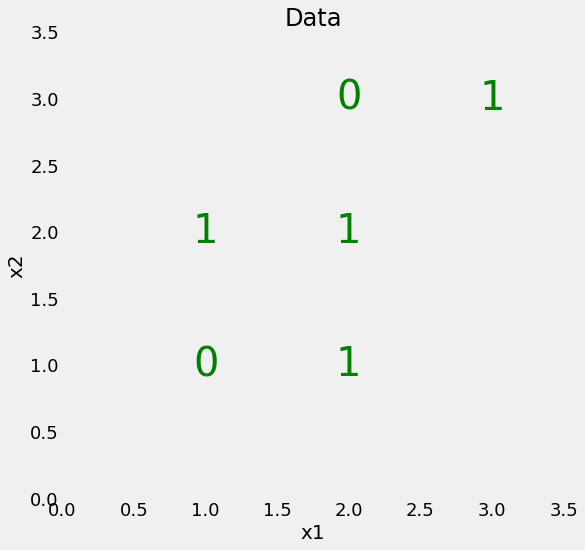

In [2]:
# create features X
X = np.array([[1, 1], [1, 2], [2, 1], [2, 2], [2, 3], [3, 3]])

# create labels y
y = np.array([0, 1, 1, 1, 0, 1])

# Data Visualization
# Plot formatting
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18
plt.figure(figsize=(8, 8))

# Plot each point as the label
for x1, x2, label in zip(X[:, 0], X[:, 1], y):
    plt.text(x1, x2, str(label), fontsize=40, color='g',
             ha='center', va='center')
# Plot formatting
plt.grid(None)
plt.xlim((0, 3.5))
plt.ylim((0, 3.5))
plt.xlabel('x1', size=20)
plt.ylabel('x2', size=20)
plt.title('Data', size=24)

# plt.show()


In [3]:
from sklearn.tree import DecisionTreeClassifier

# Make a decision tree and train
tree = DecisionTreeClassifier(random_state=RSEED)
tree.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=50, splitter='best')

In [4]:
print(
    f'Decision tree has {tree.tree_.node_count} nodes with maximum depth {tree.tree_.max_depth}.')
print(f'Model Accuracy: {tree.score(X, y)}')

Decision tree has 9 nodes with maximum depth 4.
Model Accuracy: 1.0


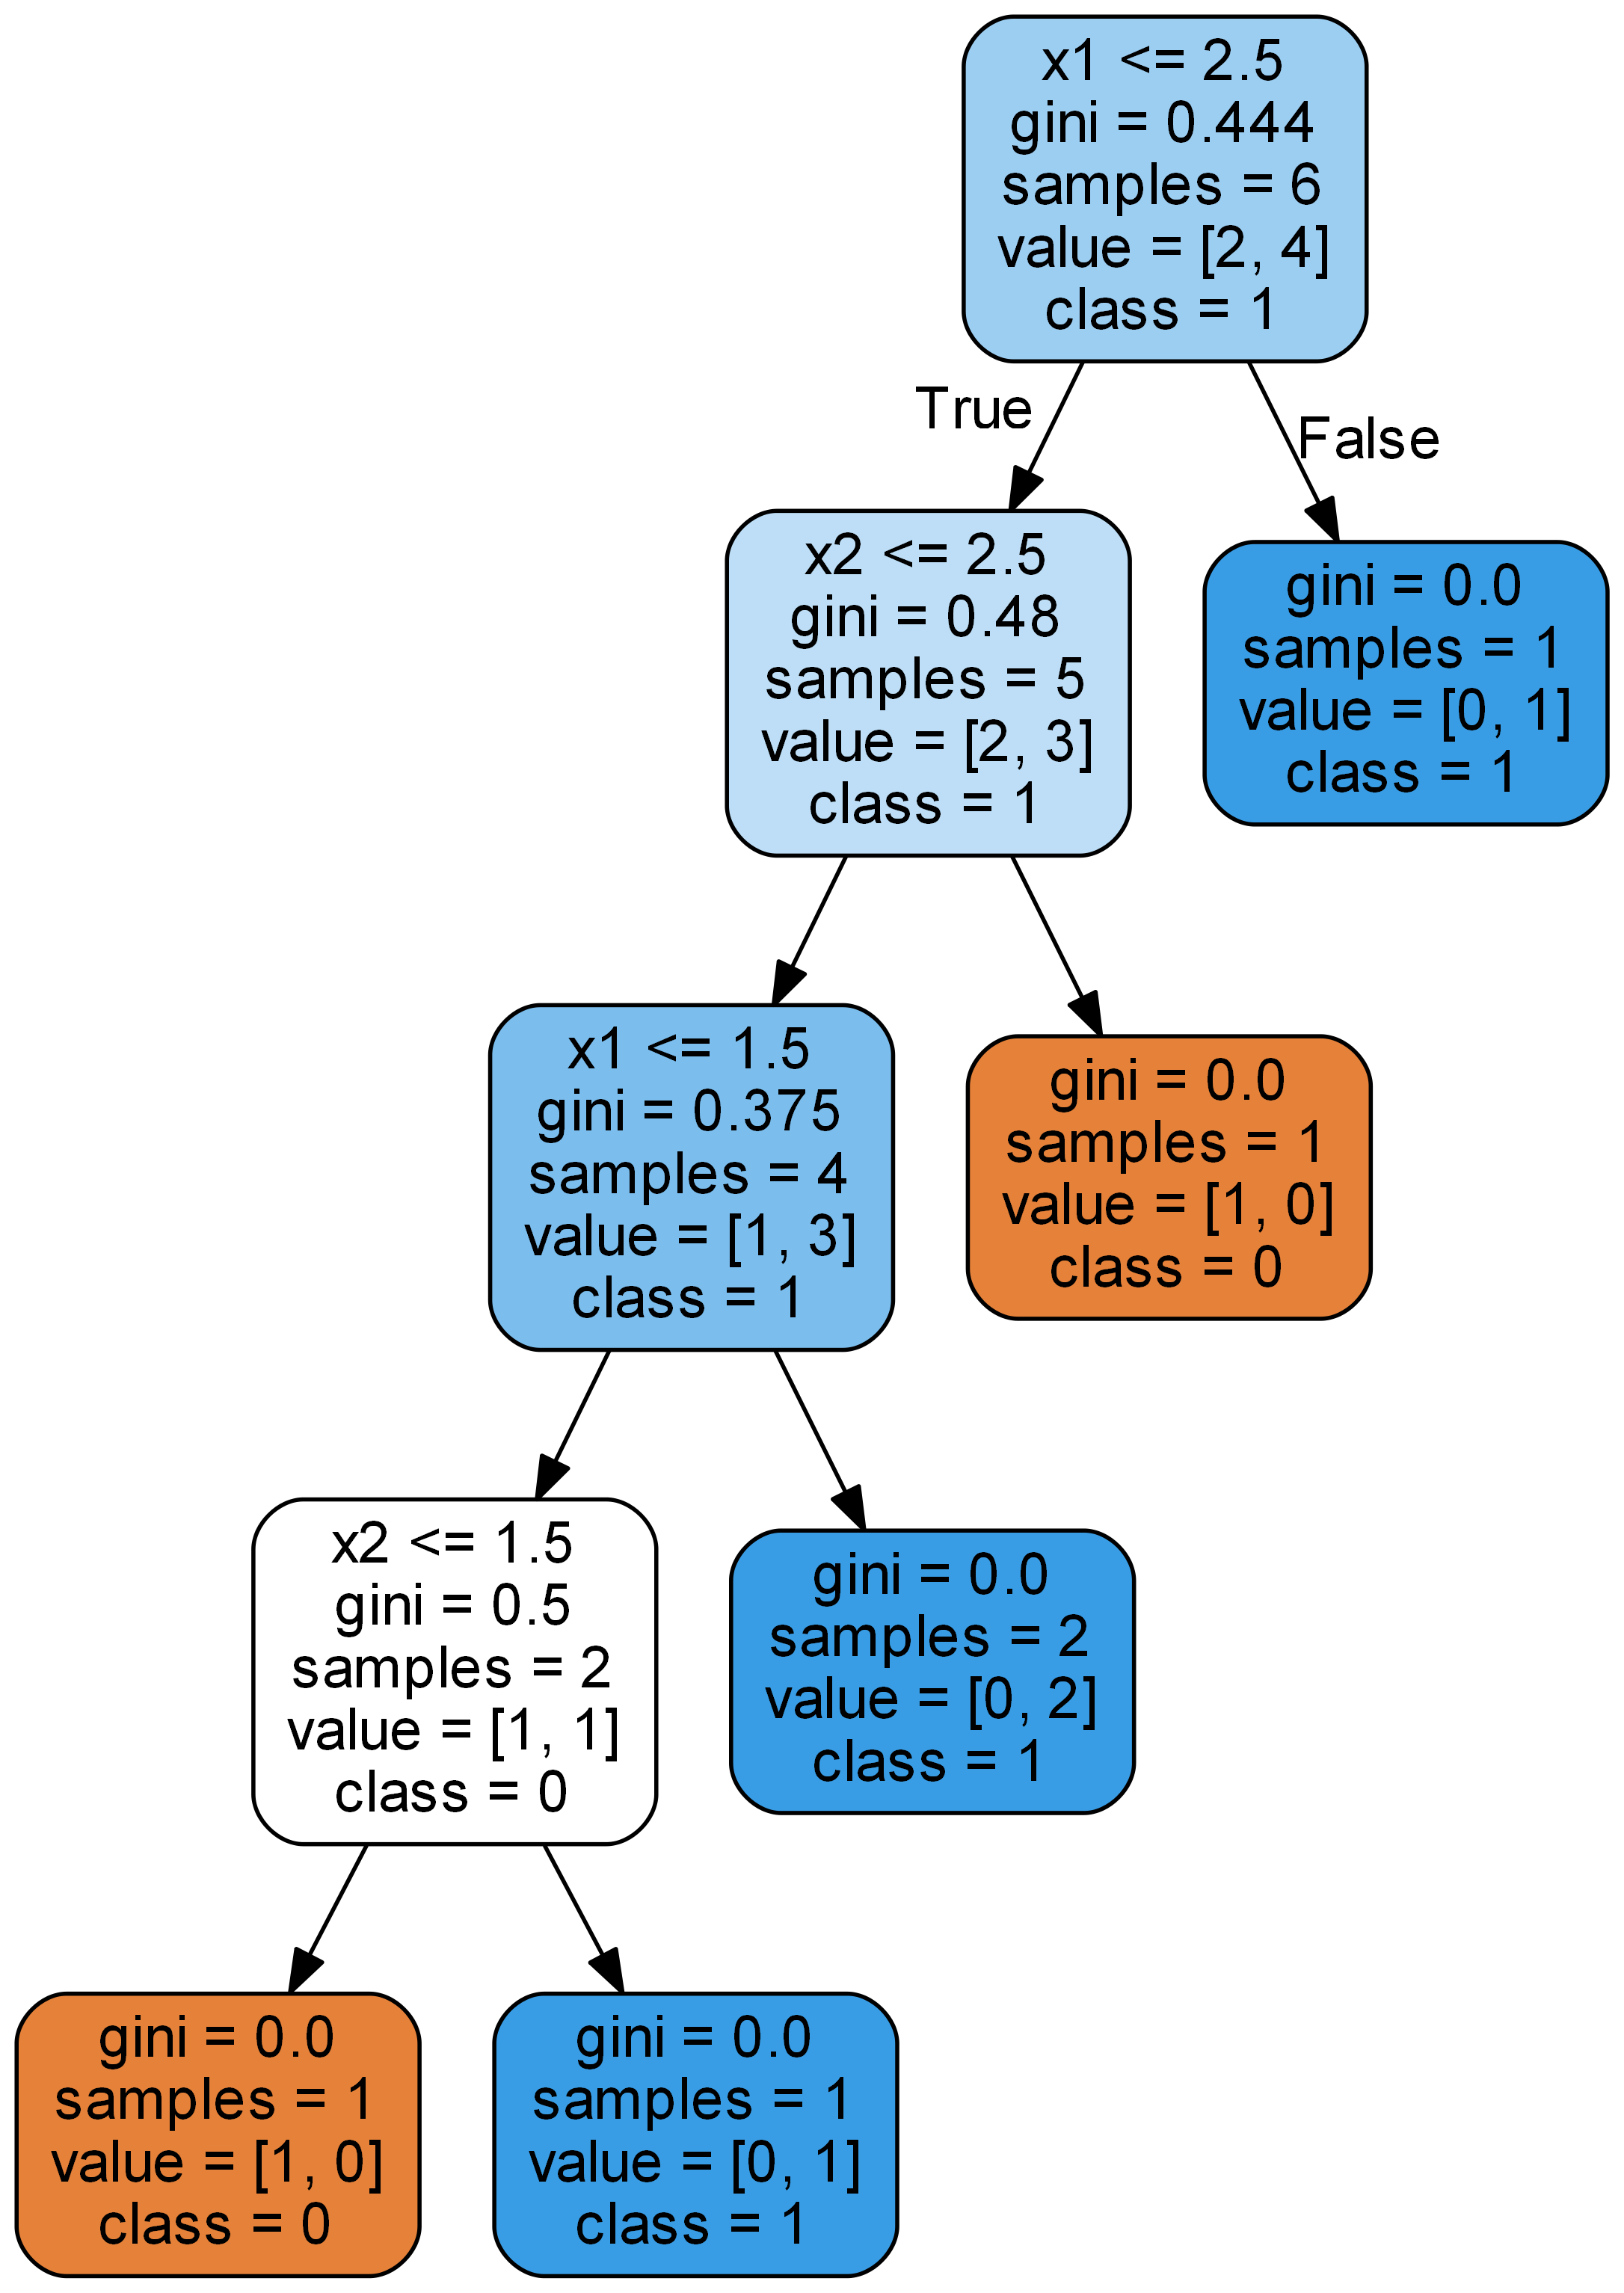

In [5]:
from IPython.display import Image
from subprocess import call
from sklearn.tree import export_graphviz

# Visualize decision tree

# Export as dot
export_graphviz(tree, 'tree.dot', rounded=True, feature_names=[
                'x1', 'x2'], class_names=['0', '1'], filled=True)

# Convert to png
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=400'])

Image('tree.png')

In [6]:
# Limit maximum depth and train
short_tree = DecisionTreeClassifier(max_depth = 2, random_state=RSEED)
short_tree.fit(X, y)

print(f'Model Accuracy: {short_tree.score(X, y)}')

Model Accuracy: 0.8333333333333334


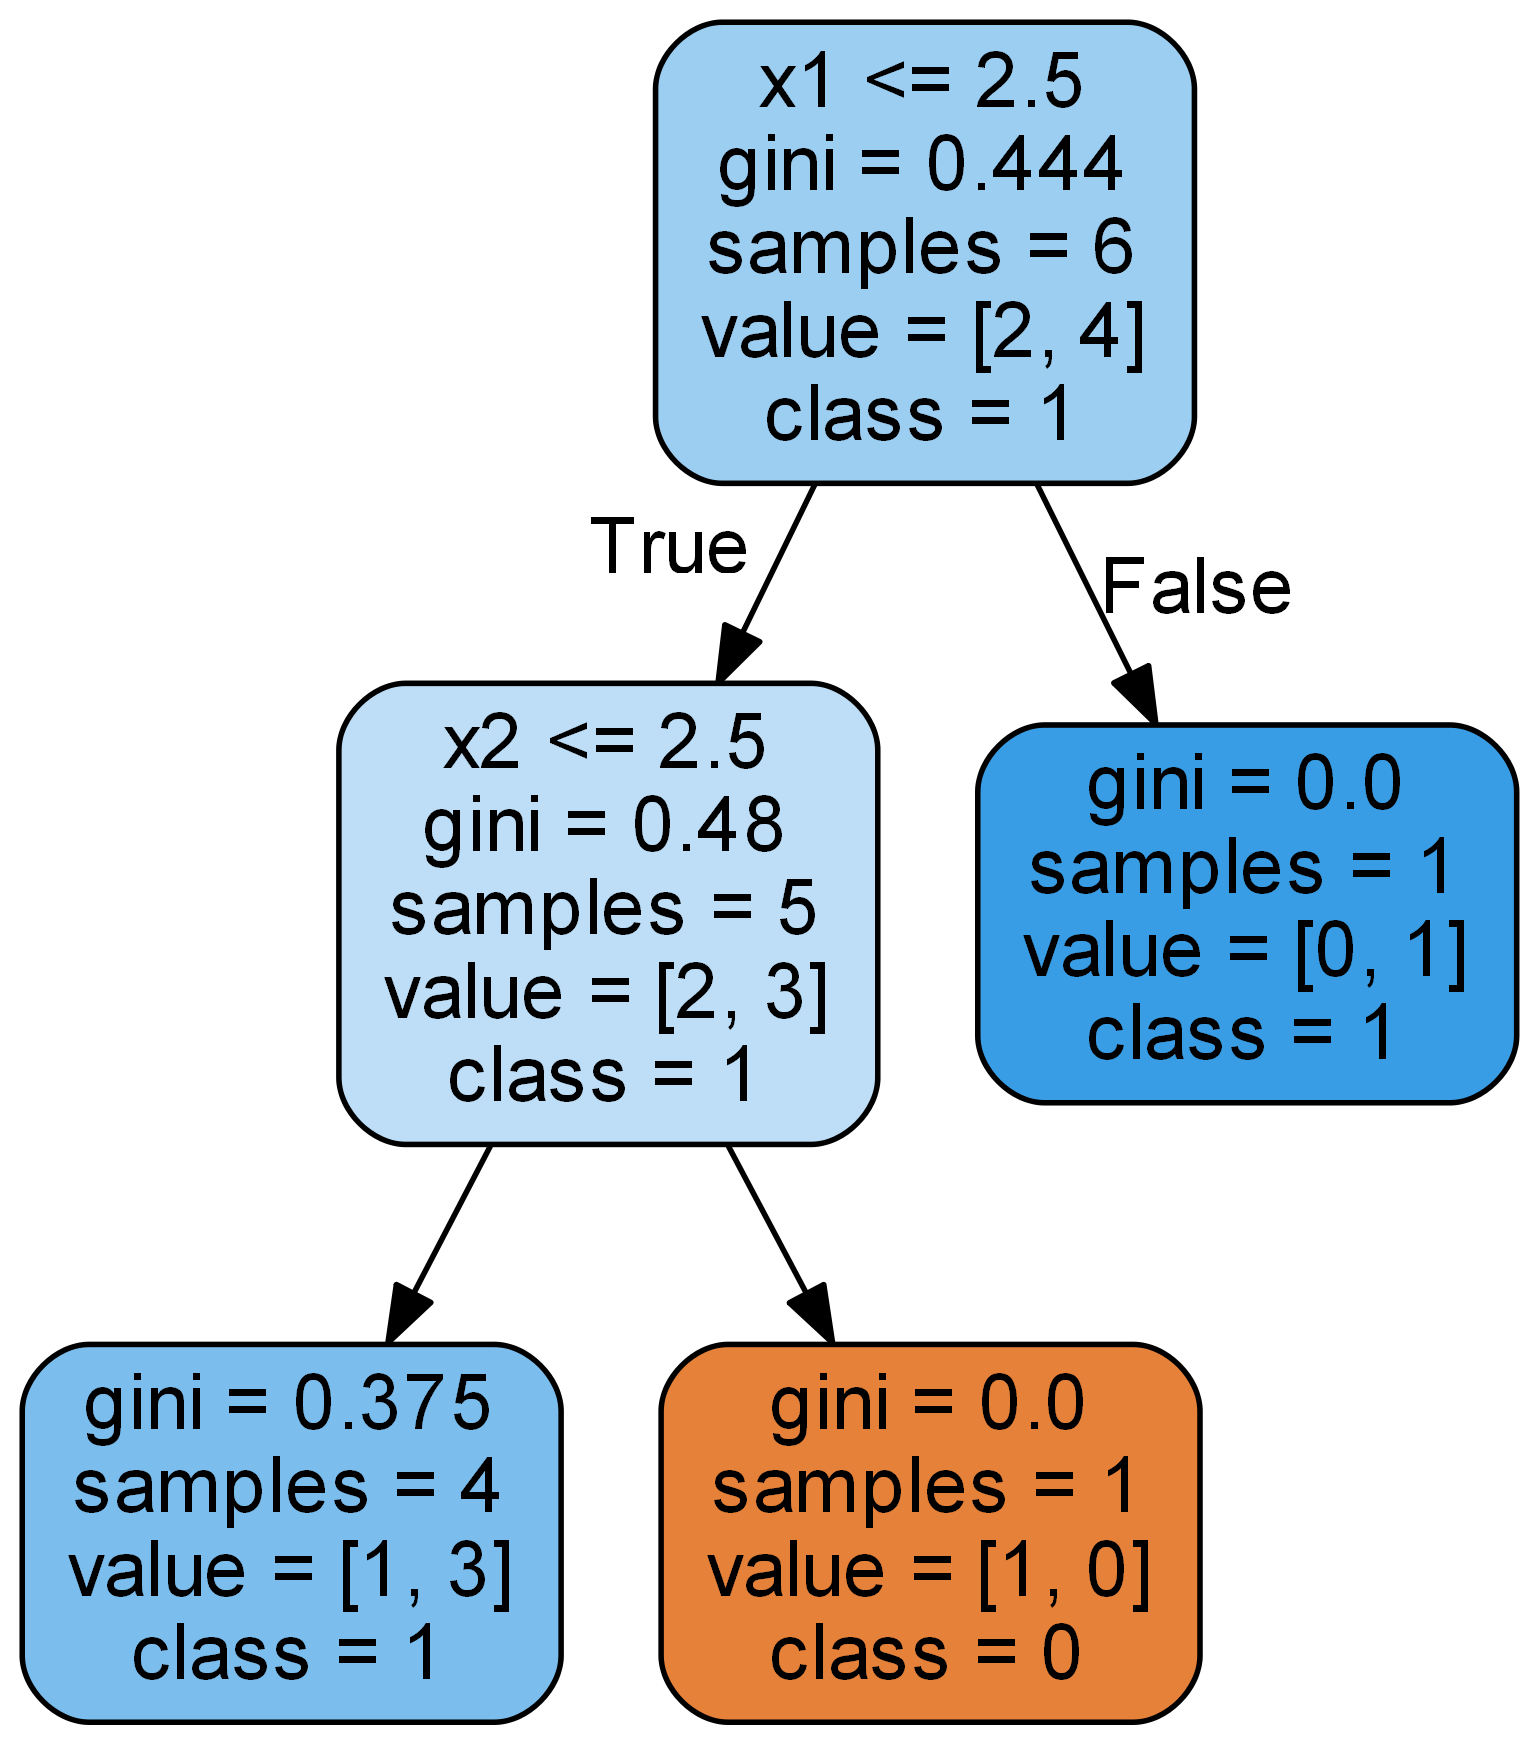

In [7]:
# Export as dot
export_graphviz(short_tree, 'shorttree.dot', rounded = True, 
                feature_names = ['x1', 'x2'], 
                class_names = ['0', '1'], filled = True)

call(['dot', '-Tpng', 'shorttree.dot', '-o', 'shorttree.png', '-Gdpi=400']);
Image('shorttree.png')

In [16]:
# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
df = pd.read_csv("../../data/2015.csv") 
df.head(5)
df = df.select_dtypes('number')

# Label distribution
df['_RFHLTH'] = df['_RFHLTH'].replace({2: 0})
df = df.loc[df['_RFHLTH'].isin([0, 1])].copy()
df = df.rename(columns={'_RFHLTH': 'label'})
df['label'].value_counts()


1.0    358072
0.0     82137
Name: label, dtype: int64

In [9]:
# Remove columns with missing values
df = df.drop(columns = ['POORHLTH', 'PHYSHLTH', 'GENHLTH', 'PAINACT2', 
                        'QLMENTL2', 'QLSTRES2', 'QLHLTH2', 'HLTHPLN1', 'MENTHLTH'])

In [10]:
# Split the data in to training and test set

from sklearn.model_selection import train_test_split

# Extract the labels
labels = np.array(df.pop('label'))

# 30% examples in test data
train, test, train_labels, test_labels = train_test_split(df, labels, stratify = labels, test_size = 0.3, random_state = RSEED)

In [11]:
# Fill the missing values in the test set with the mean of columns in the training data

train = train.fillna(train.mean())
test = test.fillna(test.mean())

features = list(train.columns)

In [12]:
train.shape

(308146, 313)

In [13]:
test.shape

(132063, 313)

In [14]:
# Train tree
tree.fit(train, train_labels)
print(f'Decision tree has {tree.tree_.node_count} nodes with maximum depth {tree.tree_.max_depth}.')

Decision tree has 54773 nodes with maximum depth 69.


In [ ]:
# Assess decision tree performance
# Make probability predictions
train_probs = tree.predict_proba(train)[:,1]
probs = tree.predict_proba(test)[:,1]

train_predictions = tree.predict(train)
predictions = tree.predict(test)